## NetworkX 파이썬 패키지를 이용한 네트워크 그래프 작성


- NetworkX 파이썬 패키지를 이용한 네트워크 그래프 작성 방법에 대해서 정리했습니다. 

In [80]:
import numpy as np 
import pandas as pd 
import re 
import networkx as nx 
import matplotlib.pyplot as plt

앞서 빅카인즈에서 2021년에 "넥슨"이 언급된 뉴스 데이터를 내려받고, 
이 중 '제목'컬럼을 텍스트 파일로 별도 저장했습니다. <br>
해당 텍스트 파일을 열고, 

In [81]:
f = open("./sample data/NewsResult_20210717-20211017.txt",'r')
lines = f.readlines()
f.close()

단어빈도 분석을 위한 한나눔을 불러옵니다. 

In [82]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

- konply 설치 안되면, 자바쪽 봐보면 해결됨 
- mac에서는 brew로 쉽게 설치 가능함

이제 반복문을 통해 텍스트 파일을 한줄씩 읽어서 정규표현식으로 dataset에 기록합니다. <br>
re.sub()는 문자열에서 일치하는 텍스트를 다른 텍스트로 치환(substitution) 할 때 사용합니다. <br> 정규표현식에서 [], 즉 대괄호는 그 안에 있는 문자열을 포함하라는 의미입니다.<br> ^는 이 패턴으로 시작해야 한다는 의미이며, 가~힣는 한글, a-zA-Z는 영문, \s는 공백을 정의합니다.

In [83]:
dataset = [] 
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','',lines[i])))

In [84]:
dataset[:10]

[['카카오게임즈', '데브시스터즈', '호', '적', '신흥강자'],
 ['취업걱정없는명품학교단국대학교부속소프트웨어고등학교'],
 ['플러스가상자산', '거래소', '미래', '먹거리', '분주'],
 ['엔씨', '넥슨', '넷마블', '지스타', '까닭은부애리', '게임사전'],
 ['개발자', '광풍', '살', '꼬마', '코딩열풍'],
 ['법', '시행', '한달', '구글', '애플', '요지부동', '인앱결제', '어디'],
 ['페이팔', '발굴', '실리콘밸리', '투자사', '토종', '퍼센트', '억', '투자'],
 ['콘텐츠', '분쟁', '조정', '신청', '위', '블리자드'],
 ['게임', '대응', '전문성', '인력', '부족한', '콘분위', '확충', '시급'],
 ['채용현장', '메타버스', '대', '취준', '게임']]

이제 Apriori 알고리즘을 적용하여 연관규칙 분석을 수행해 봅니다. 

In [85]:
from apyori import apriori 

result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

In [86]:
df.head(10)

,items,support,ordered_statistics,length
124,"(넥슨, 김정주)",0.029139,"[((), (넥슨, 김정주), 0.02913907284768212, 1.0), ((...",2
114,"(크래프톤, 공모)",0.027815,"[((), (공모, 크래프톤), 0.02781456953642384, 1.0), (...",2
123,"(김범수, 카카오)",0.026490,"[((), (김범수, 카카오), 0.026490066225165563, 1.0), ...",2
130,"(넥슨, 대표)",0.023841,"[((), (넥슨, 대표), 0.02384105960264901, 1.0), ((넥...",2
134,"(넥슨, 신작)",0.021192,"[((), (넥슨, 신작), 0.02119205298013245, 1.0), ((넥...",2
126,"(대표, 김정주)",0.019868,"[((), (대표, 김정주), 0.019867549668874173, 1.0), (...",2
141,"(넥슨, 출시)",0.017219,"[((), (넥슨, 출시), 0.017218543046357615, 1.0), ((...",2
137,"(넥슨, 종)",0.017219,"[((), (넥슨, 종), 0.017218543046357615, 1.0), ((넥...",2
157,"(확률형, 아이템)",0.017219,"[((), (확률형, 아이템), 0.017218543046357615, 1.0), ...",2
122,"(최고, 김범수)",0.015894,"[((), (최고, 김범수), 0.015894039735099338, 1.0), (...",2


이제 위 항목들을 네트워크 그래프로 작성해 보겠습니다. 

In [87]:
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

네트워크의 자료구조는 노드와 엣지로 구성됩니다. page rank는 노트 순위를 제공하므로 노드 색상과 크기를 지정하는데 유용하게 사용됩니다. 

In [88]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

NetworkX 패키지는 아래와 같이 다양한 레이아웃을 제공합니다. 

- https://zooyeonii.tistory.com/41 참고

In [89]:
pos = nx.planar_layout(G)

In [90]:
# import matplotlib
# from matplotlib import font_manager, rc
# import platform

# if platform.system() == 'Windows':
# # 윈도우인 경우
#     font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#     rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')
    
# matplotlib.rcParams['axes.unicode_minus'] = False

In [91]:
# nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

In [92]:
# import matplotlib.font_manager as fm 
# fpi = fm.FontProperties(fname="./NotoSansKR-Regular.otf")
# nx.set_fontproperties(fpi)

이제 네트워크 그래프를 그려볼까요? 아래와 같이 단어간 연관성을 한눈에 볼 수 있습니다.

{'넥슨': Text(-1.0, -0.3612, '넥슨'),
 '김정주': Text(0.4256, -0.3084, '김정주'),
 '크래프톤': Text(-0.4896000000000001, 0.1492, '크래프톤'),
 '공모': Text(-0.014400000000000034, 0.1316, '공모'),
 '김범수': Text(-0.34880000000000005, 0.29, '김범수'),
 '카카오': Text(-0.4368000000000001, 0.202, '카카오'),
 '대표': Text(0.020799999999999968, 0.0964, '대표'),
 '신작': Text(0.020799999999999968, 0.0788, '신작'),
 '출시': Text(0.055999999999999966, 0.025999999999999992, '출시'),
 '종': Text(0.14399999999999996, -0.044400000000000016, '종'),
 '확률형': Text(-0.20800000000000005, 0.3252, '확률형'),
 '아이템': Text(-0.33120000000000005, 0.3076, '아이템'),
 '최고': Text(-0.31360000000000005, 0.2372, '최고'),
 '퍼블리싱': Text(0.23199999999999998, -0.13240000000000002, '퍼블리싱'),
 '모바': Text(0.020799999999999968, 0.06119999999999999, '모바'),
 '창업자': Text(0.4784, -0.3612, '창업자'),
 '일': Text(0.3024, -0.20280000000000004, '일'),
 '개발': Text(0.21439999999999998, -0.11480000000000001, '개발'),
 '계약': Text(0.2496, -0.16760000000000003, '계약'),
 '코노스바': Text(0.020799999999999

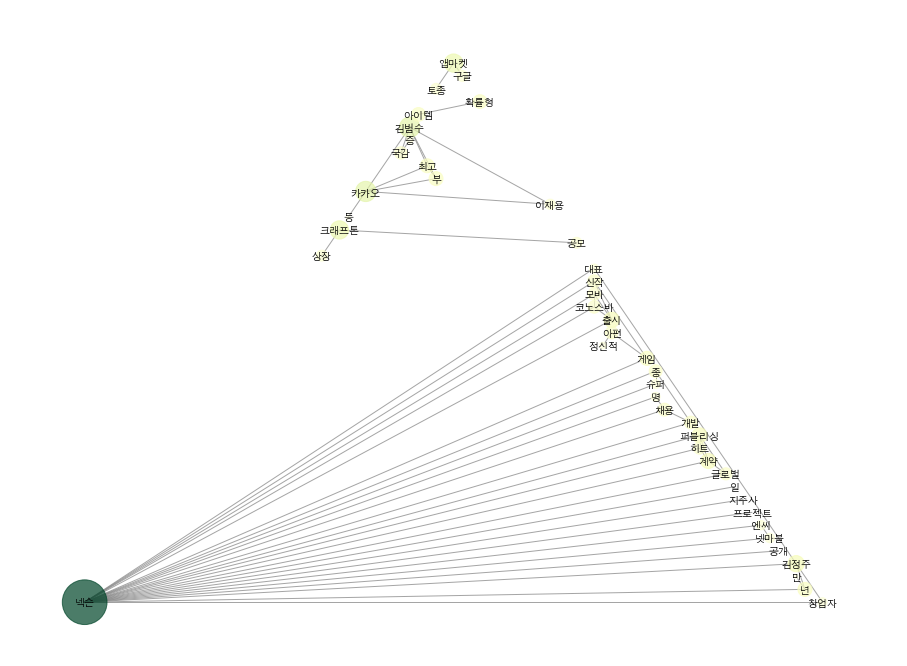

In [93]:
pos = nx.planar_layout(G)

plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5',cmap=plt.cm.YlGn,
                with_labels=False)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size=10)

{'넥슨': Text(0.9999999943329235, 3.6801950442451223e-09, '넥슨'),
 '김정주': Text(0.9898214283913788, 0.1423148395393146, '김정주'),
 '크래프톤': Text(0.9594929759158657, 0.2817325618474658, '크래프톤'),
 '공모': Text(0.9096320218146957, 0.4154150209483075, '공모'),
 '김범수': Text(0.8412535139753691, 0.5406407730795391, '김범수'),
 '카카오': Text(0.7557495784761364, 0.654860736209755, '카카오'),
 '대표': Text(0.6548607305426786, 0.7557495841432129, '대표'),
 '신작': Text(0.5406407674124627, 0.8412535196424455, '신작'),
 '출시': Text(0.41541507488587565, 0.9096319678771276, '출시'),
 '종': Text(0.28173255618038945, 0.9594929815829422, '종'),
 '확률형': Text(0.14231486367456042, 0.9898214340584552, '확률형'),
 '아이템': Text(-4.569826952543544e-08, 1.0, '아이템'),
 '최고': Text(-0.14231483784600096, 0.9898214340584552, '최고'),
 '퍼블리싱': Text(-0.2817325005495076, 0.9594929815829422, '퍼블리싱'),
 '모바': Text(-0.41541501925499386, 0.9096320274817722, '모바'),
 '창업자': Text(-0.5406407713862255, 0.8412535196424455, '창업자'),
 '일': Text(-0.6548606749117969, 0.755

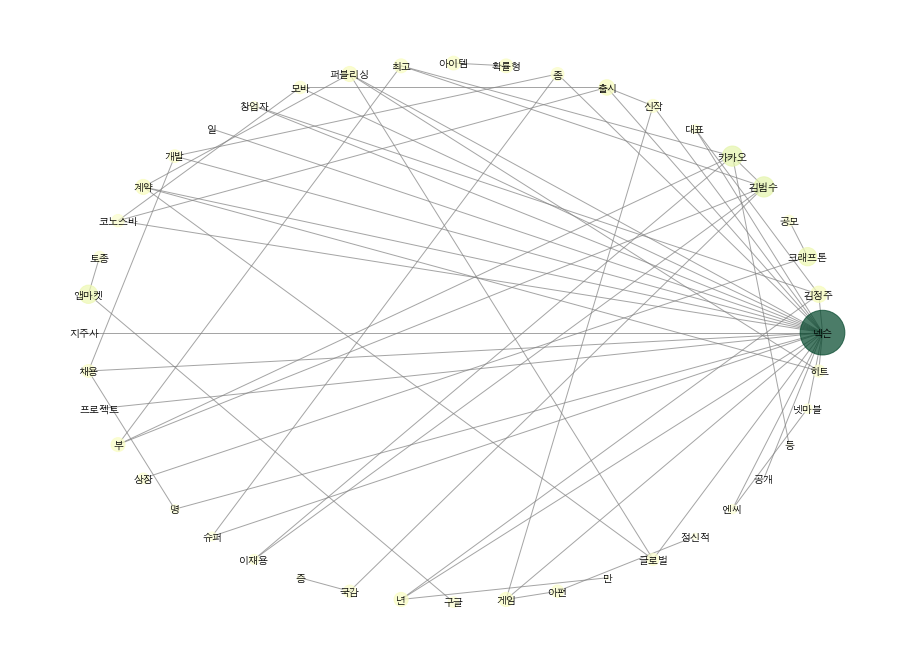

In [94]:
pos = nx.circular_layout(G)

plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_size=16,
               pos=pos, node_color=list(pr.values()), node_size=nsize,
               alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn,
               with_labels=False)

nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size=10)

참고 
- https://zzolab.com/networkx-%EC%9D%BC%EB%8B%A8-%EA%B7%B8%EB%9E%98%ED%94%84%EB%A5%BC-%EA%B7%B8%EB%A0%A4%EB%B3%B4%EC%9E%90-e69fe01aaba9
- https://blog.daum.net/geoscience/1408